In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6


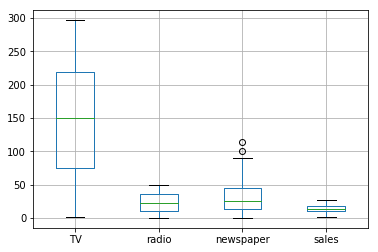

In [3]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011A7F883C50>,
      dtype=object)

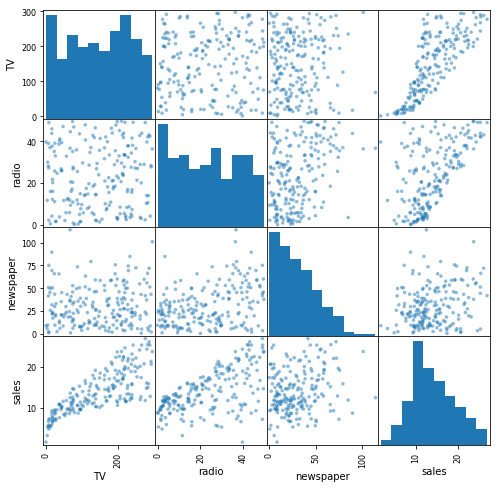

In [4]:
from pandas.tools.plotting import scatter_matrix
#plt.scatter(df['TV'],df['radio'],df['newspaper'],df['sales'])
#colMap=("red","blue","green")
pd.plotting.scatter_matrix(df,alpha=0.5, figsize=(8, 8), diagonal='hist', s=50)#c=colMap to add colors to plot, could also use diagonal = 'kde'


In [5]:
from sklearn.linear_model import LinearRegression
import numpy
#Randomize data
df = df.sample(frac=1)

#Set parameters
y = df['sales']
X = df[['TV','radio','newspaper']]

# Split the targets into training/testing sets
y_train_data = y[0:int(len(df)*0.8)]
y_test_data = y[int(len(df)*0.8):]
X_train_data = X[0:int(len(df)*0.8)]
X_test_data = X[int(len(df)*0.8):]

#Create a linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train_data, y_train_data)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f" %numpy.mean((regr.predict(X_test_data) - y_test_data) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test_data, y_test_data))

Coefficients: 
 [ 0.04745905  0.18208924 -0.00476554]
Residual sum of squares: 2.91
Variance score: 0.89


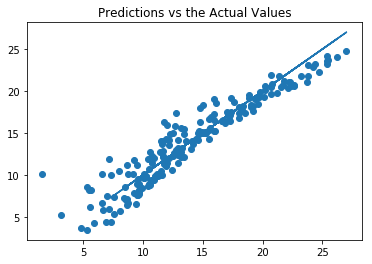

In [6]:
#f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

plt.scatter(y,regr.predict(X))
y_predict = regr.predict(X_test_data)

plt.plot(y_test_data,y_test_data)
plt.title('Predictions vs the Actual Values')
plt.show()

In [7]:
#g) Can you measure the importance of features in this model? What is something you should check before making conclusions?
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


x_scale = preprocessing.StandardScaler().fit(X).transform(X)
x_scale_train, x_scale_test, y_scale_train, y_scale_test = train_test_split(x_scale, y, test_size=0.2, random_state=1)

regr = LinearRegression()
regr.fit(x_scale_train, y_scale_train)
regr.coef_

print("        Normalized Data\n\n", pd.DataFrame({'Coefficient':regr.coef_, 'Factor':['TV','Radio','Newspaper']}))

        Normalized Data

    Coefficient     Factor
0     3.992685         TV
1     2.815469      Radio
2    -0.175791  Newspaper


Text(0.5,0,'sales')

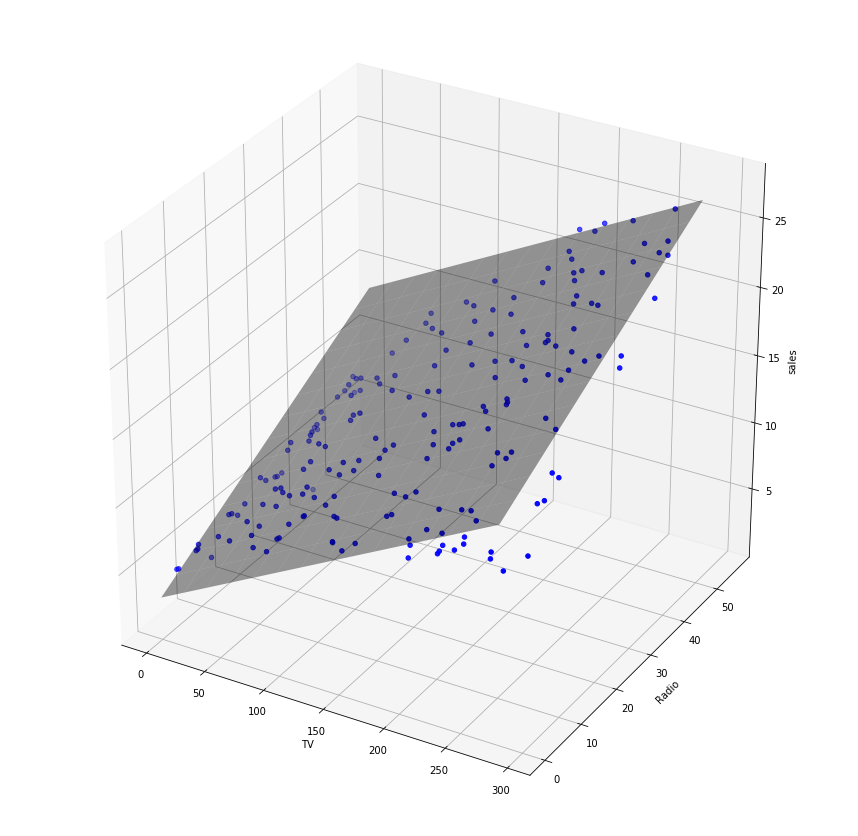

In [8]:
#How could you have improved performance?
#Hint: Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer 
#a new variable which will help, or try a nonlinear/non-parametric model

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

regr_1 = LinearRegression()
regr_1.fit(X[['TV','radio']], y)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = numpy.arange(0, 300, 20)
y_surf = numpy.arange(0, 60, 4)
x_surf, y_surf = numpy.meshgrid(x_surf, y_surf)

new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
predict_sales = regr_1.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(X['TV'], X['radio'], y, c='blue')

ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('sales')

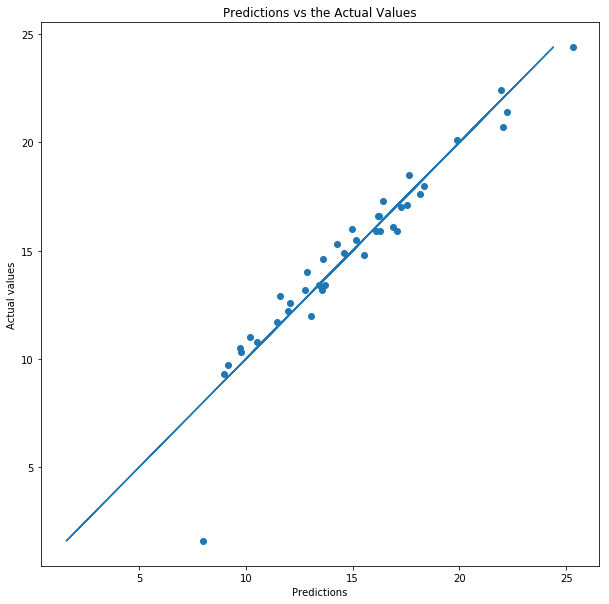

In [9]:
X['TV*radio'] = X['TV']*X["radio"]
new_X = X.drop(['newspaper'], 1)


new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size=0.2, random_state=1)

regr_2 = LinearRegression()
regr_2.fit(new_X_train, new_y_train)

plt.figure(figsize=(10, 10))
plt.scatter(regr_2.predict(new_X_test), new_y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.title('Predictions vs the Actual Values')
plt.plot(new_y_test, new_y_test)
plt.show()

In [10]:
#x_scale = preprocessing.StandardScaler().fit(X).transform(X)

X['TV*radio'] = X['TV']*X["radio"]
new_x = X.drop(['newspaper'], 1)


new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, y, test_size=0.2, random_state=1)

regr2 = LinearRegression()
regr2.fit(new_x_train, new_y_train)
regr2.coef_
pd.DataFrame({'Coefficient':regr2.coef_, 'Factor':['TV','Radio','TV*Radio']})


,Coefficient,Factor
0,0.020729,TV
1,0.036355,Radio
2,0.001036,TV*Radio


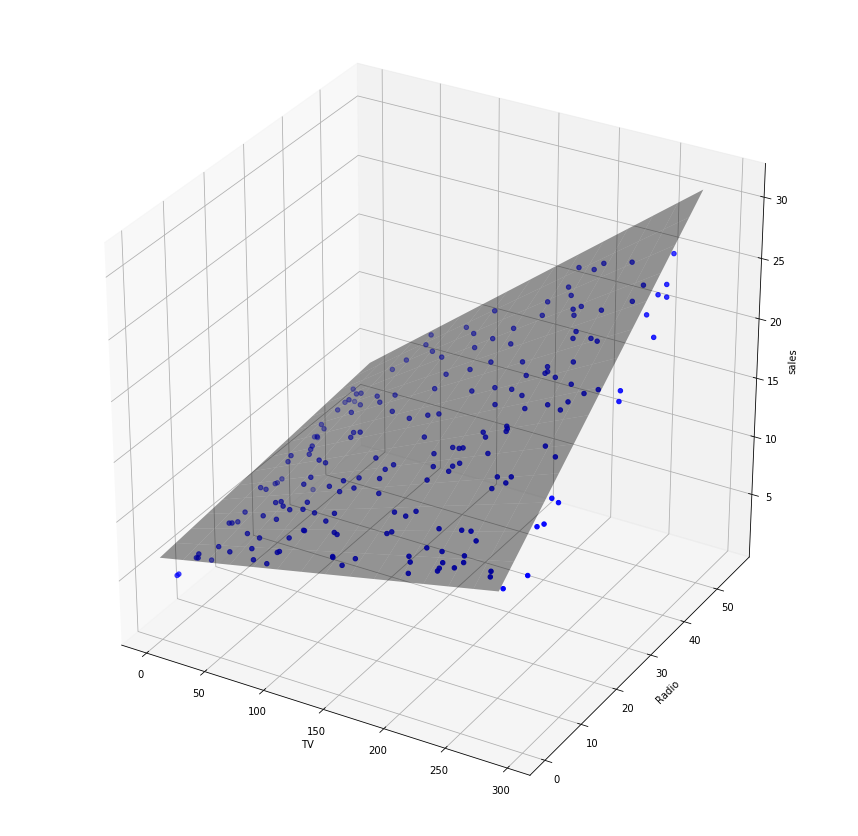

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = numpy.arange(0, 300, 20)
y_surf = numpy.arange(0, 60, 4)
x_surf, y_surf = numpy.meshgrid(x_surf, y_surf)

new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
new_x['TV*radio'] = new_x['TV']*new_x["radio"]
predict_sales = regr_2.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(X['TV'], X['radio'], y, c='blue')

ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('sales')
plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 100 iterations b = 0.03507497059521459, m = 1.4788027175308887, error = 112.64705662802109


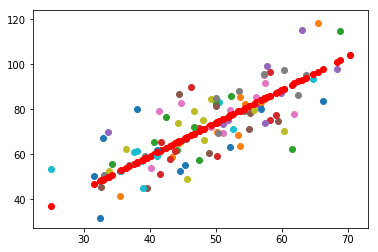

In [12]:
#Problem 3: Gradient Descent and the learning rate
#By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
#Can you explain in words or math why this is?


# When the learning rate starts from a low value (close to 0), the converence rate will increase as the learning rate increases.
# There is a positive correlation between these two, until a critical point where the learning rate becomes too large. When the
# convergence rate starts to decrease with an increase in the learning rate, the algorithm might still try to converge until
# the learning rate is too large for convergence.


#set learning rate to 0.0001

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("C:/Users/Fernando/Downloads/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100, 0.0001)

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834490552


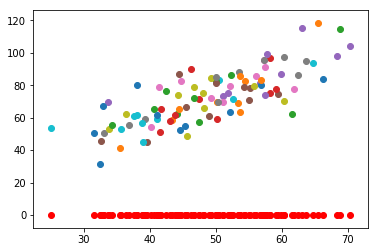

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 1 iterations b = 0.014547010110780006, m = 0.7370702973620529, error = 1484.5865573886724


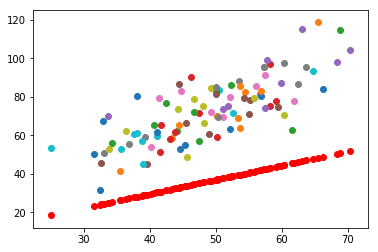

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 2 iterations b = 0.021873962959646963, m = 1.1067954543544998, error = 457.85425755492486


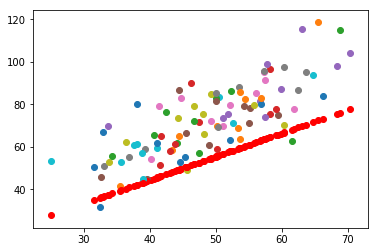

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 3 iterations b = 0.02557922432134817, m = 1.2922546649153903, error = 199.50998570899654


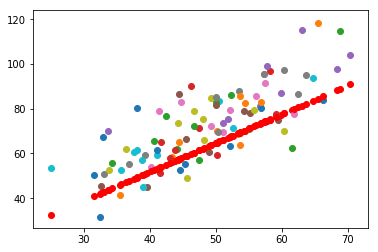

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 4 iterations b = 0.02746778955920927, m = 1.385283255652807, error = 134.50591056654895


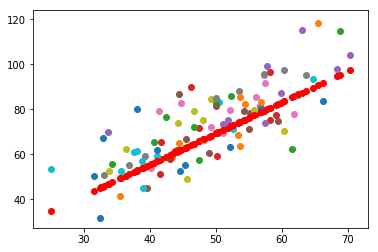

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 5 iterations b = 0.028445071981820017, m = 1.4319472323853406, error = 118.14969340734376


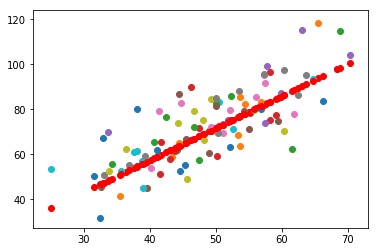

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 6 iterations b = 0.028965240766580733, m = 1.4553540088986976, error = 114.03414904545865


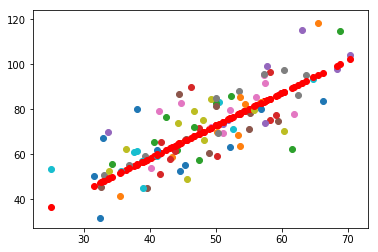

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 7 iterations b = 0.02925611412617324, m = 1.4670946177205637, error = 112.99857730225531


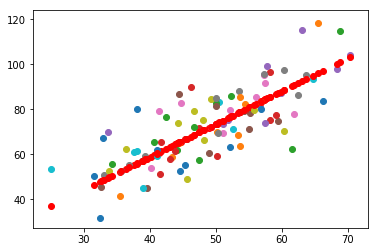

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 8 iterations b = 0.029431969163960233, m = 1.472983298224667, error = 112.73798186081585


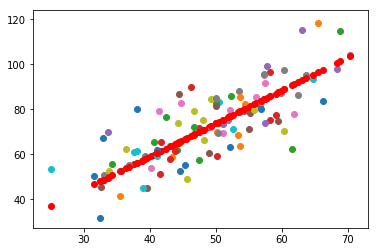

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 9 iterations b = 0.029550129024564036, m = 1.4759365618964382, error = 112.67238434422576


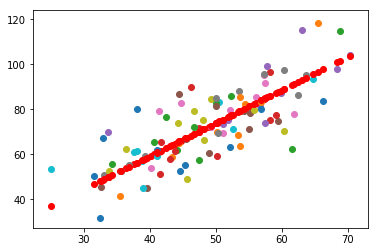

In [13]:
# Use this to visually discuss convergence rate based on learning rate
#learning_rate is set to 0.0001 by default but we'll include it here anyways
for num in range(0,10):
    run(num, learning_rate=0.0001)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834490552


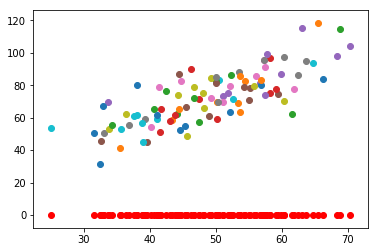

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 1 iterations b = 0.14547010110780004, m = 7.370702973620529, error = 86648.79500519576


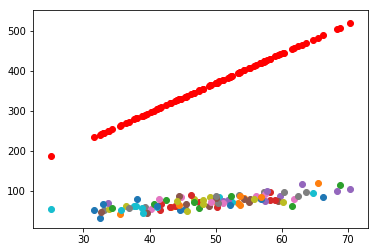

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 2 iterations b = -0.43106552397570397, m = -21.99310808971955, error = 1373530.9289042347


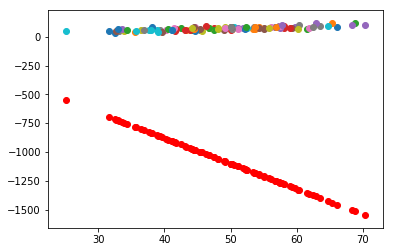

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 3 iterations b = 1.868758899496782, m = 94.98776074802961, error = 21797683.774641342


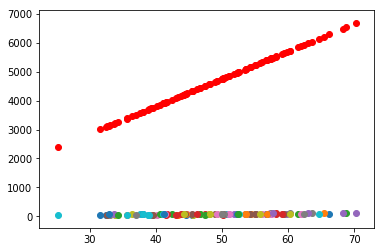

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 4 iterations b = -7.29039496794401, m = -371.0461698747582, error = 345950151.490818


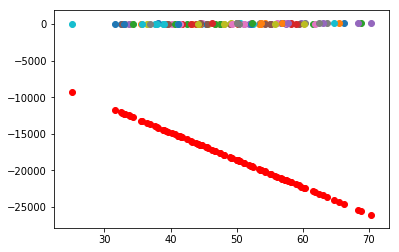

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 5 iterations b = 29.201266088594195, m = 1485.5616014282414, error = 5490585677.795477


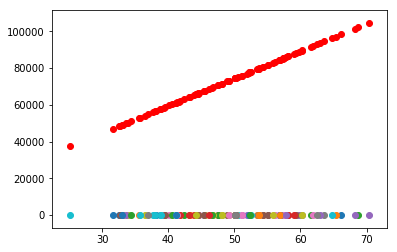

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 6 iterations b = -116.1729306324055, m = -5910.879573030493, error = 87141281984.2772


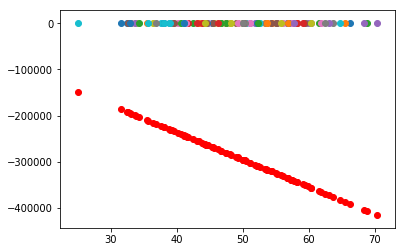

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 7 iterations b = 462.9786062796138, m = 23555.40961756189, error = 1383022432990.0522


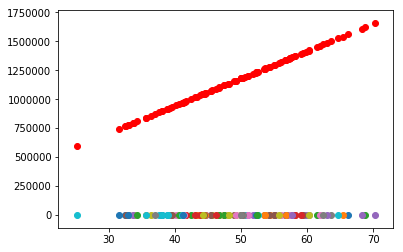

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 8 iterations b = -1844.26945548074, m = -93833.77530977625, error = 21949998998978.48


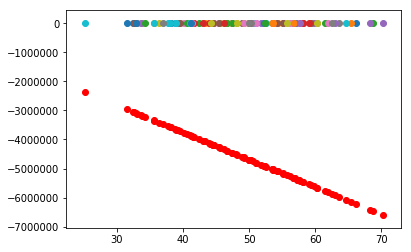

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 9 iterations b = 7347.456578025482, m = 373826.76518555277, error = 348369227133913.6


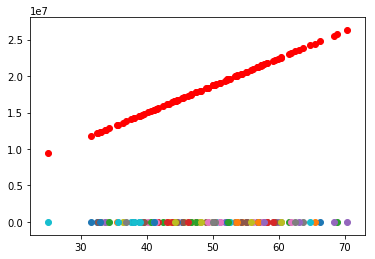

In [14]:
#set learning rate to 0.001
# Use this to visually discuss convergence rate based on learning rate
learning_rate = 0.001

for num in range(0,10):
    run(num, learning_rate)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834490552


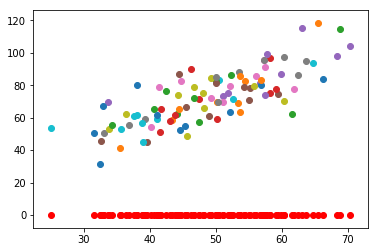

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 1 iterations b = 1.4547010110780005, m = 73.70702973620529, error = 13005291.973713946


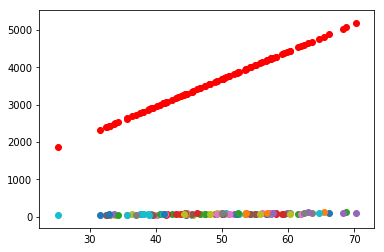

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 2 iterations b = -69.29117059697445, m = -3526.0373442236496, error = 31019902537.09262


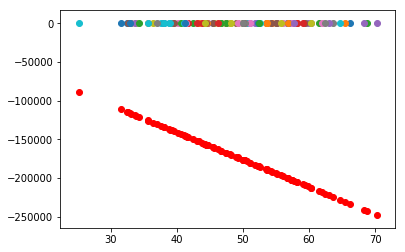

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 3 iterations b = 3386.1281599231343, m = 172279.96081617026, error = 73988548889239.66


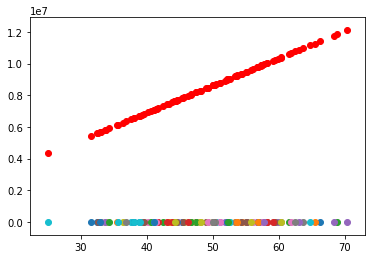

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 4 iterations b = -165370.96267484693, m = -8413815.837547788, error = 1.764771949251528e+17


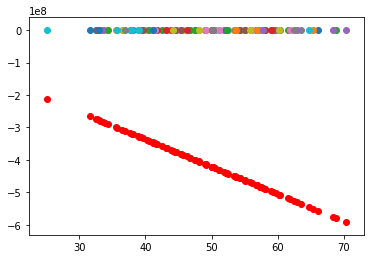

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 5 iterations b = 8076467.286673313, m = 410917957.70027053, error = 4.209327091320629e+20


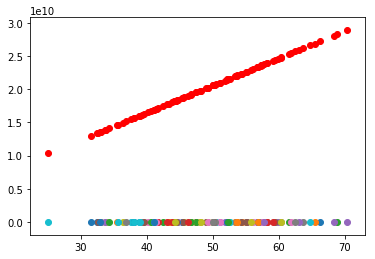

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 6 iterations b = -394442294.32022214, m = -20068603868.08589, error = 1.0040070372401687e+24


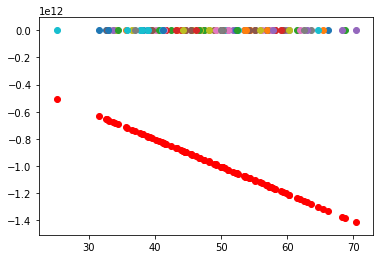

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 7 iterations b = 19263957769.6476, m = 980119888108.6692, error = 2.3947536244124984e+27


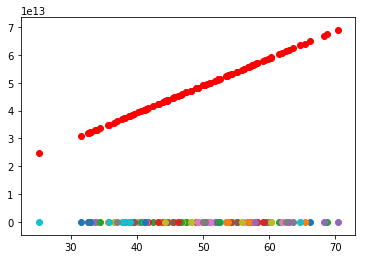

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 8 iterations b = -940822204490.8788, m = -47867554778940.82, error = 5.711956897633747e+30


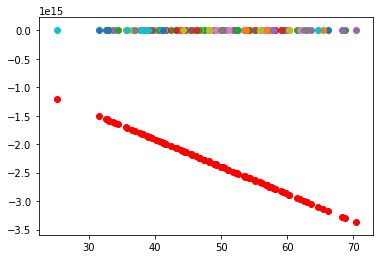

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 9 iterations b = 45948316075584.945, m = 2337778090535446.0, error = 1.362413705853767e+34


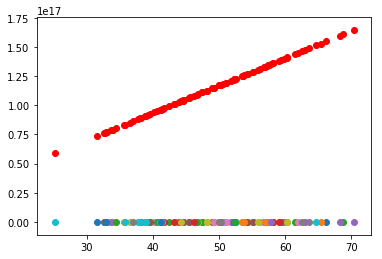

In [15]:
#set learning rate to 0.01
# Use this to visually discuss convergence rate based on learning rate
learning_rate = 0.01

for num in range(0,10):
    run(num, learning_rate)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834490552


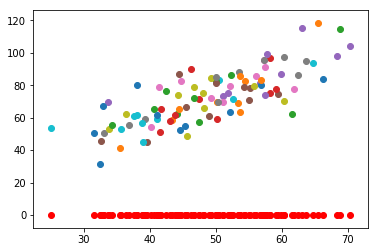

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 1 iterations b = 1454.7010110780004, m = 73707.02973620528, error = 13542667625962.352


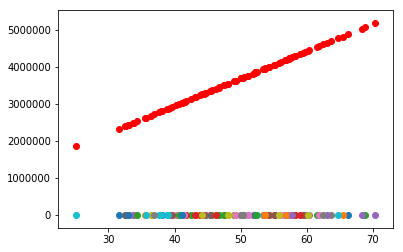

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 2 iterations b = -72197663.2171083, m = -3673303989.6365876, error = 3.3636916491065668e+22


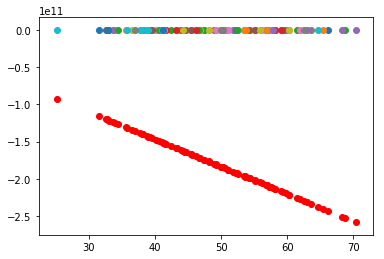

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 3 iterations b = 3598149177393.5386, m = 183068173804959.88, error = 8.354647564908765e+31


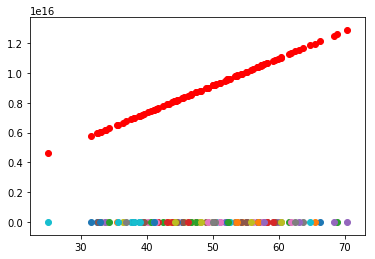

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 4 iterations b = -1.7932264811226426e+17, m = -9.123654438261427e+18, error = 2.075105069526086e+41


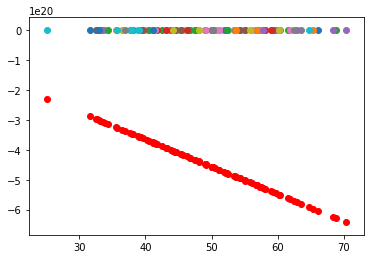

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 5 iterations b = 8.936986917635038e+21, m = 4.546998453018529e+23, error = 5.1540906018096995e+50


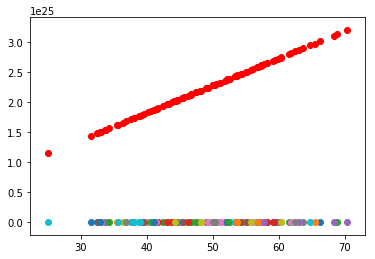

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 6 iterations b = -4.453968085279314e+26, m = -2.2661089447939115e+28, error = 1.2801592710546409e+60


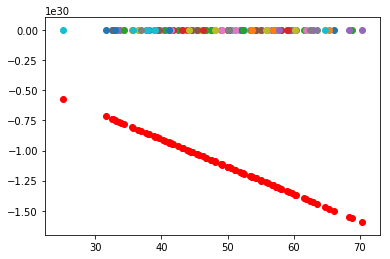

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 7 iterations b = 2.219744964104332e+31, m = 1.129371343037502e+33, error = 3.179625439047842e+69


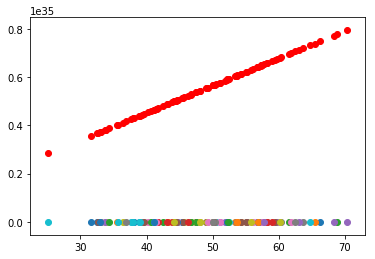

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 8 iterations b = -1.1062647085306963e+36, m = -5.628500930657275e+37, error = 7.897468823790328e+78


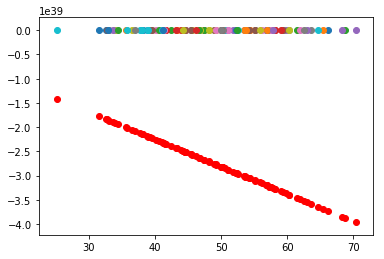

Starting gradient descent at b = 0, m = 0, error = 5565.107834490552
Running...
After 9 iterations b = 5.513343312547253e+40, m = 2.8051024069023e+42, error = 1.9615522336938295e+88


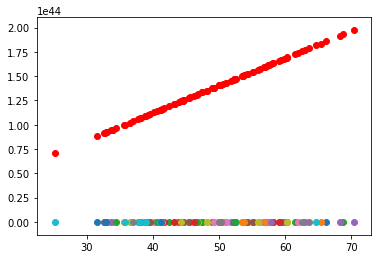

In [16]:
#set learning rate to 10
# Use this to visually discuss convergence rate based on learning rate
learning_rate = 10

for num in range(0,10):
    run(num, learning_rate)
    plt.show()

Text(0.5,1,'Error Story Graph')

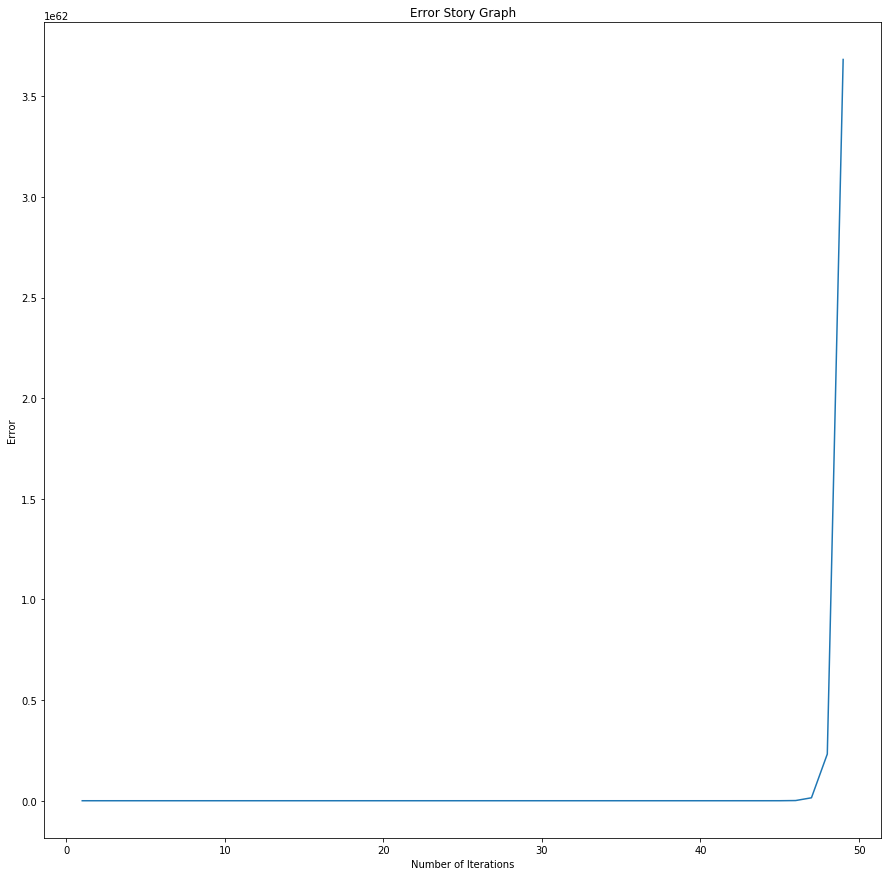

In [19]:
points = genfromtxt("C:/Users/Fernando/Downloads/data.csv", delimiter=",")

initial_b = 0
initial_m = 0
num_iterations = numpy.arange(1,50)
errors=[]
learning_rate = 0.001

for i in num_iterations:
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, i)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.figure(figsize=(15, 15))
plt.plot(num_iterations,errors)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error Story Graph')


Text(0.5,1,'Error Story Graph')

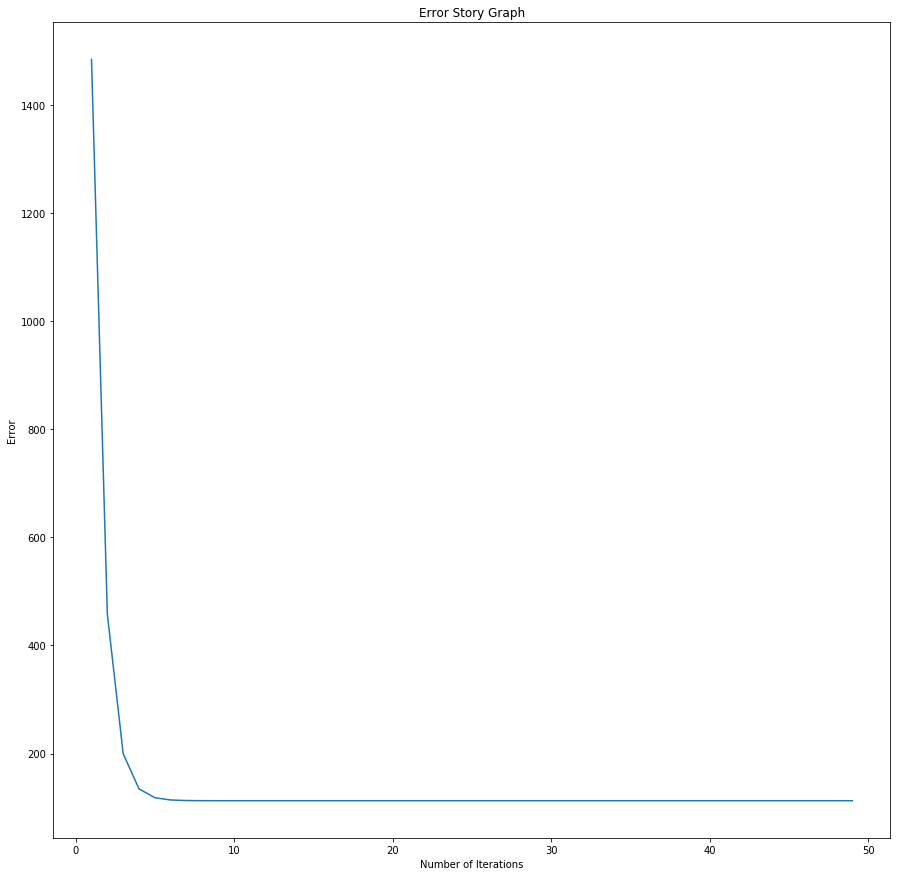

In [20]:
points = genfromtxt("C:/Users/Fernando/Downloads/data.csv", delimiter=",")

initial_b = 0
initial_m = 0
num_iterations = numpy.arange(1,50)
errors=[]
learning_rate = 0.0001

for i in num_iterations:
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, i)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.figure(figsize=(15, 15))
plt.plot(num_iterations,errors)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error Story Graph')

Text(0.5,1,'Error Story Graph')

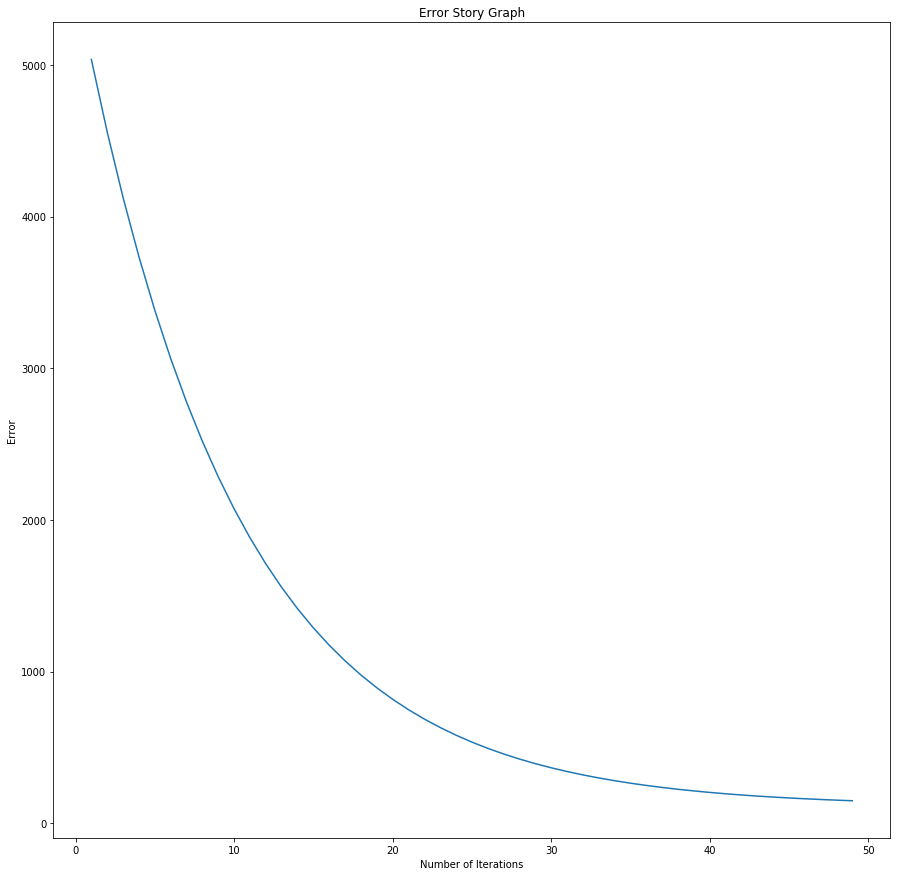

In [22]:
points = genfromtxt("C:/Users/Fernando/Downloads/data.csv", delimiter=",")

initial_b = 0
initial_m = 0
num_iterations = numpy.arange(1,50)
errors=[]
learning_rate = 0.00001

for i in num_iterations:
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, i)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.figure(figsize=(15, 15))
plt.plot(num_iterations,errors)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error Story Graph')